#Feature Engineering
https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/04-Correlation/04.2-Basic-methods-plus-correlation-pipeline.ipynb

*   Constant
*   Quasi Constant
*   Duplicated
*   Correlation

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression,SelectKBest

# Read Dataset

In [ ]:
dataset=pd.read_csv("/content/dataset_1.csv")
X=dataset.drop("target",axis=1)
y=dataset["target"]

# Split the data into Test and Training set

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Keep Backup

In [ ]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [ ]:
X_train_original.shape

(35000, 300)

In [ ]:
cons_col_list=[]
for col in X_train.columns:
     if X_train[col].nunique()==1:
        cntunique=X_train[col].nunique()
        cons_col_list.append(col)
       

In [ ]:
print("The number of constant feature is {}".format(len(cons_col_list)))

The number of constant feature is 34


# Finding Constant Variables using std() and List Comprehension

In [ ]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

In [ ]:
print("The number of constant feature is {}".format(len(constant_features)))

The number of constant feature is 34


# Drop Constant Features

In [ ]:
X_train.drop(cons_col_list,axis=1, inplace=True)
X_test.drop(cons_col_list,axis=1, inplace=True)

In [ ]:
X_train.shape,X_test.shape

((35000, 266), (15000, 266))

#Finding Quasi Constant Features

In [ ]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)# fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [ ]:
sel.get_support()
features_to_keep = X_train.columns[sel.get_support()]

#Drop Quasi Constant Features

In [ ]:
X_train=sel.transform(X_train)
X_test=sel.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((35000, 215), (15000, 215))

# Restore DataFrame

In [ ]:
X_train=pd.DataFrame(X_train)
X_train.columns= features_to_keep
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

# Remove Duplicated 

In [ ]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
#len(duplicated_feat)

In [ ]:
duplicated_feat

In [ ]:
# remove duplicated features
X_train.drop(duplicated_feat, axis=1, inplace=True)
X_test.drop(duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

# Finding Correlation Matrix

In [ ]:
corrmat=X_train.corr()

In [ ]:
type(corrmat)

pandas.core.frame.DataFrame

# Get Highly correlated Features

In [ ]:
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

In [ ]:
len(to_drop)

93

In [ ]:
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

# Use Mutual Info to select features

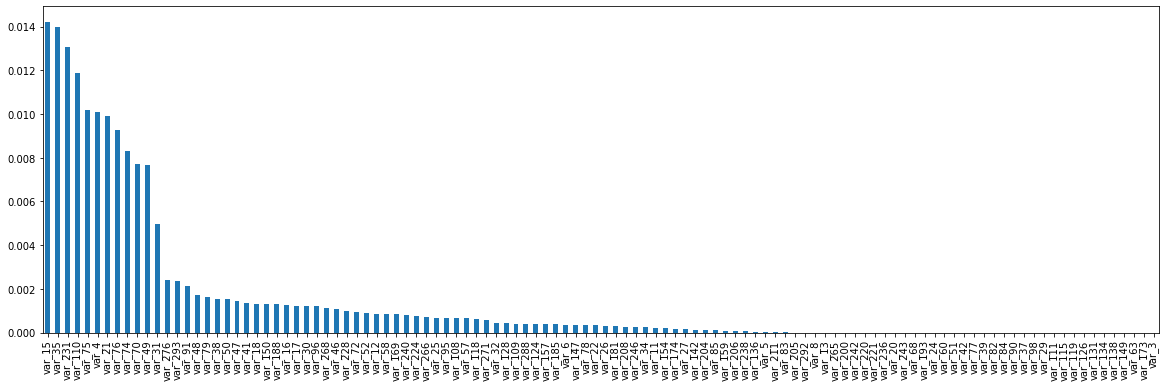

In [ ]:
mi=mutual_info_classif(X_train,y_train)
mi=pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))


In [ ]:
mi.max(),mi.min(),mi.mean(),mi.std()

(0.01421536626464004, 0.0, 0.0014915798653675285, 0.0031742433140064495)

In [ ]:
len(mi[mi<0.0142346626464004])

112

# Select n  best features based on Mutual Information by using SelectKBest method of Sklearn.feature_selection

In [ ]:
sel_ = SelectKBest(mutual_info_classif, k=100)
#sel_ = SelectKBest(mutual_info_regression, k=10)
sel_.fit(X_train, y_train)

SelectKBest(k=100, score_func=<function mutual_info_classif at 0x7fd0c1fc7ef0>)

# Get columns to remain

In [ ]:
#sel.get_support()
features_to_keep = X_train.columns[sel_.get_support()]

In [ ]:
X_train=X_train[features_to_keep]
X_test=X_test[features_to_keep]

In [ ]:
X_train.shape,X_test.shape

((35000, 100), (15000, 100))